# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharma_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
pharma_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [71]:
# Checking the number of mice.
total_mice = pharma_df.groupby("Mouse ID")["Mouse ID"].count()
print(len(total_mice))

249


In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated = pharma_df[pharma_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()
duplicated

array(['g989'], dtype=object)

In [73]:
# Optional: Get all the data for the duplicate mouse ID. 

# assuming that 'pharma_df' is the original DataFrame
duplicated_mice = pharma_df[pharma_df.duplicated(subset=['Mouse ID'], keep=False)]['Mouse ID'].unique()

# filter the DataFrame to include only the rows with the duplicate mouse ID(s)
duplicate_data = pharma_df[pharma_df['Mouse ID'].isin(duplicated_mice)]

# print the resulting DataFrame
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_df = pharma_df.drop_duplicates(subset=['Mouse ID'], keep='first')
new_df = new_df.reset_index()
new_df = new_df.drop("index",axis=1)
new_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice in the clean DataFrame.
print(len(new_df))

249


## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = pharma_df.groupby("Drug Regimen")
summary_df = grouped.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Rename the columns for better readability
summary_df.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume SEM']

# Print the summary DataFrame
summary_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df.rename(columns={"Mean Tumor Volume":"mean","Median Tumor Volume":"median","Tumor Volume Variance":"var","Tumor Volume Std. Dev.":"std","Tumor Volume SEM":"sem"},inplace=True)
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [87]:
pharma_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

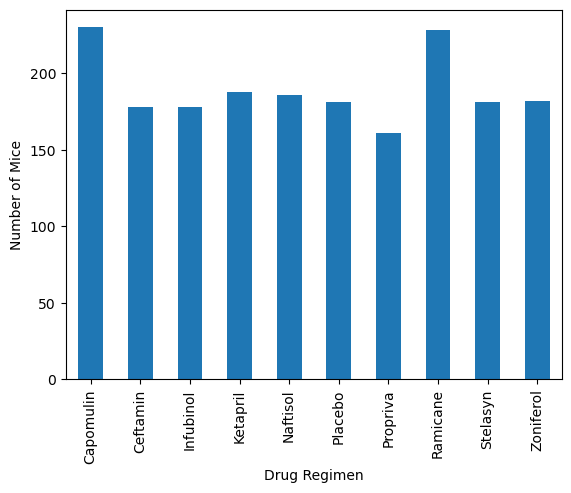

In [95]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_counts = pharma_df.groupby('Drug Regimen')['Mouse ID'].count()
drug_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice')
plt.show()


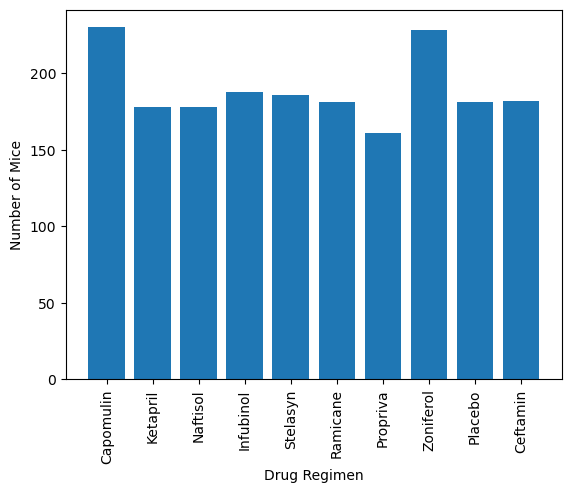

In [102]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x = pharma_df["Drug Regimen"]
y = pharma_df.groupby('Drug Regimen').size()
plt.bar(pharma_df['Drug Regimen'].unique(), y.values)
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


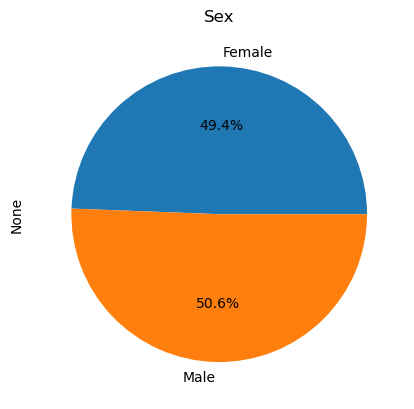

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = pharma_df.groupby('Sex').size()
sex_counts.plot(kind='pie',title="Sex",autopct='%.1f%%')
plt.title("Sex")
plt.show()

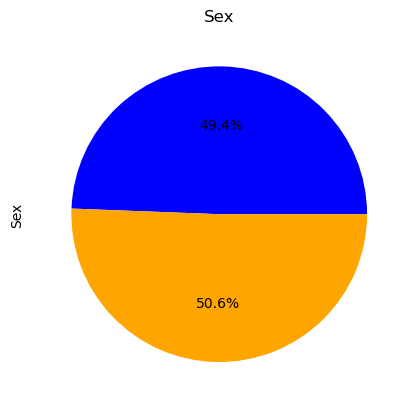

In [115]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_counts = pharma_df.groupby('Sex').size()
colors = ['Blue', 'Orange']
plt.pie(sex_counts, colors=colors,autopct='%.1f%%')
plt.title('Sex')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [153]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
q_df = pharma_df.loc[pharma_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
# Start by getting the last (greatest) timepoint for each mouse
q_df = q_df.drop_duplicates(subset=['Mouse ID'], keep='last')
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge_df = pd.merge(q_df,pharma_df, how='outer', on=['Drug Regimen','Tumor Volume (mm3)'])

,Mouse ID_x,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Mouse ID_y,Timepoint_y,Metastatic Sites_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,45.0,38.982878,2.0,Capomulin,Female,9.0,22.0,b128,45,2,Female,9,22
1,c326,5.0,36.321346,0.0,Infubinol,Female,18.0,25.0,c326,5,0,Female,18,25
2,c139,45.0,72.226731,2.0,Infubinol,Male,11.0,28.0,c139,45,2,Male,11,28
3,v339,5.0,46.250112,0.0,Infubinol,Male,20.0,26.0,v339,5,0,Male,20,26
4,a577,30.0,57.031862,2.0,Infubinol,Female,6.0,25.0,a577,30,2,Female,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,NaN,NaN,34.255732,NaN,Capomulin,NaN,NaN,NaN,m601,20,1,Male,22,17
1964,NaN,NaN,33.118756,NaN,Capomulin,NaN,NaN,NaN,m601,25,1,Male,22,17
1965,NaN,NaN,31.758275,NaN,Capomulin,NaN,NaN,NaN,m601,30,1,Male,22,17
1966,NaN,NaN,30.834357,NaN,Capomulin,NaN,NaN,NaN,m601,35,1,Male,22,17


In [158]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = q_df["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = q_df["Tumor Volume (mm3)"].tolist()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_outliers = {}
for drug in treatments:
    subset = q_df[q_df["Drug Regimen"] == drug]
    quartiles = subset['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = subset.loc[(subset['Tumor Volume (mm3)'] < lower_bound) | (subset['Tumor Volume (mm3)'] > upper_bound)]
    drug_outliers[drug] = outliers['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
for drug, outliers in drug_outliers.items():
    if outliers.empty:
        print(f"{drug}'s potential outliers: None")
    else:
        print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: None
Infubinol's potential outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: None
Ceftamin's potential outliers: None


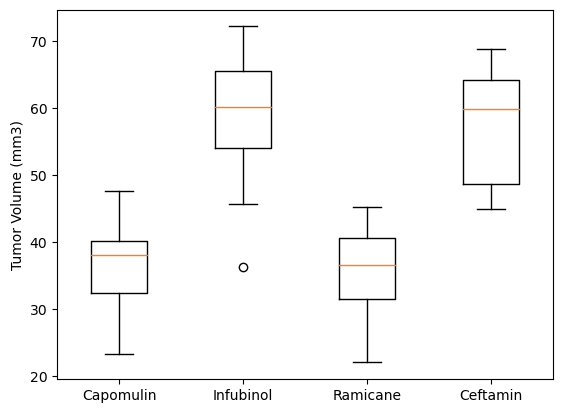

In [162]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Put treatments into a list for for loop (and later for plot labels)
treatments = q_df["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = [q_df[q_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"] for treatment in treatments]

# Generate box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_volume)
ax.set_xticklabels(treatments)
ax.set_ylabel("Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

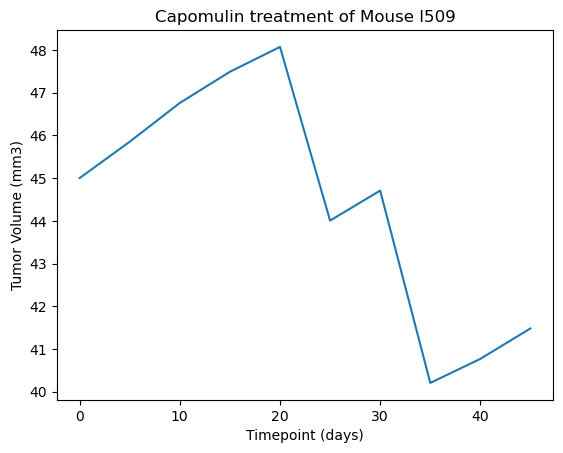

In [168]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_df = pharma_df[pharma_df["Mouse ID"] == "l509"]

# Create line plot
plt.plot(mouse_df["Timepoint"], mouse_df["Tumor Volume (mm3)"])

# Set axis labels and title
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin treatment of Mouse l509")

# Show plot
plt.show()




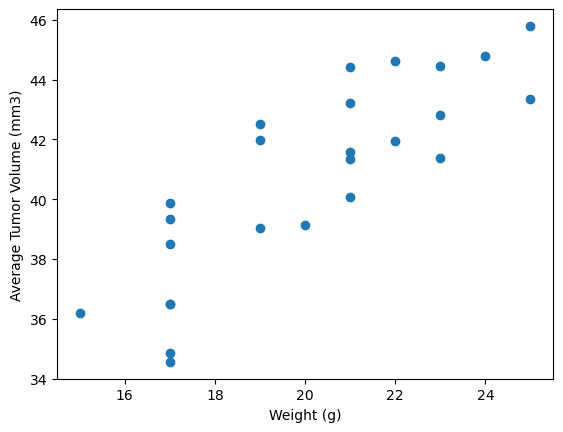

In [181]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = pharma_df.loc[pharma_df["Drug Regimen"]=="Capomulin"]
average_tumor = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(weight, average_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between average tumor volume and weight is 0.84


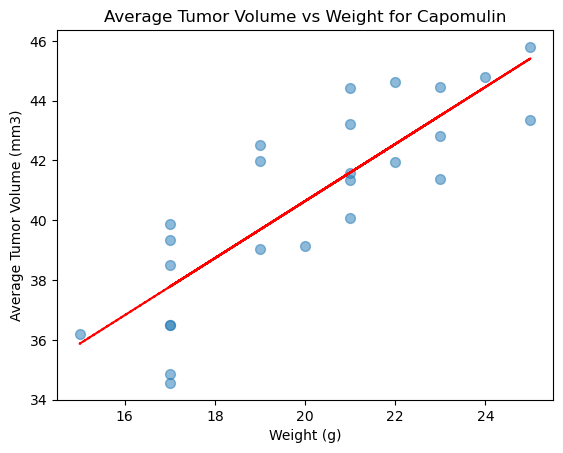

In [184]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between average tumor volume and weight is {round(st.pearsonr(average_tumor,weight)[0],2)}")

fig, ax = plt.subplots()
ax.scatter(weight, average_tumor, alpha=0.5, s=50)

# Add a line of regression
z = np.polyfit(weight, average_tumor, 1)
p = np.poly1d(z)
ax.plot(weight,p(weight),"r--")

# Set the labels and title
ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")
ax.set_title("Average Tumor Volume vs Weight for Capomulin")

plt.show()